In [395]:
using Random;
using Distributions;
using Plots;
using AverageShiftedHistograms;

In [396]:
Random.seed!(123)

TaskLocalRNG()

In [397]:
function central_limit_theorem(N::Integer, d::Any)
    x = rand(d, N)
    μ = mean(x[1:N])
    σ = var(x[1:N])
    return x, μ, σ
end

central_limit_theorem (generic function with 1 method)

In [398]:
n = 120
dist = Cosine() #Arcsine, Beta, Cauchy, Chi2, Exponential, Gamma, Laplace, Logistic, Normal, Pareto, StudentT, Uniform, Weibull
M = 4

4

In [399]:
x, μ, σ = central_limit_theorem(n, dist)

([0.021221654398232204, 0.08735291151106139, 0.4653333871187897, -0.3394937586558626, 0.02567630948351507, -0.11051521029230571, -0.6113231145932332, 0.552759021919428, 0.08099559057745864, -0.17727353467353169  …  -0.23649629441888464, -0.23336399820846054, 0.3123462905391534, 0.17764699823828778, 0.23624351076841776, -0.8087222340277549, -0.04308529273430395, -0.7863235269373945, -0.5529564183366347, -0.6060044192704481], -0.017344169130706178, 0.13101977713276633)

In [400]:
#display("text/plain", x)
display("text/plain", μ)
display("text/plain", σ)
if (σ >= zero(σ))
    display("text/plain", "OK")
else
    display("text/plain", "FAIL")
end

-0.017344169130706178

0.13101977713276633

"OK"

In [401]:
function get_normals(samples::Vector{Float64})
    means = zeros(0)
    vars = zeros(0)
    for i in 1:length(samples)
        append!(means, mean(samples[1:i]))
        if (i > 1)
            append!(vars, var(samples[1:i]))
        end
    end
    return means, vars
end

get_normals (generic function with 1 method)

In [402]:
means, vars = get_normals(x)

([0.021221654398232204, 0.0542872829546468, 0.19130265100936109, 0.058603548593055166, 0.052018100771147144, 0.024929215593905003, -0.06596397443282902, 0.011376400111203111, 0.01911186571856484, -0.0005266743206448155  …  0.0020082774259855534, -9.326074932200104e-5, 0.0026716910319919407, 0.004206562147836641, 0.006224274744537347, -0.0008011261931548281, -0.0011625293259851625, -0.007816436085403885, -0.012397444339615909, -0.017344169130706178], [0.0021866715836615608, 0.057412969041337254, 0.10871151982259782, 0.08175048048202374, 0.06980323058649386, 0.11600036277473008, 0.14728115065522948, 0.12940954367678986, 0.11888742803919627, 0.10706762936070502  …  0.1221856451553562, 0.12157951740003482, 0.12135786628856536, 0.12055246741509947, 0.11996317350488823, 0.12464534144130877, 0.12358609426603732, 0.12775419093129262, 0.12916881905467556, 0.13101977713276633])

In [403]:
#display("text/plain", x)
display("text/plain", means)
display("text/plain", vars)

120-element Vector{Float64}:
  0.021221654398232204
  0.0542872829546468
  0.19130265100936109
  0.058603548593055166
  0.052018100771147144
  0.024929215593905003
 -0.06596397443282902
  0.011376400111203111
  0.01911186571856484
 -0.0005266743206448155
  ⋮
 -9.326074932200104e-5
  0.0026716910319919407
  0.004206562147836641
  0.006224274744537347
 -0.0008011261931548281
 -0.0011625293259851625
 -0.007816436085403885
 -0.012397444339615909
 -0.017344169130706178

119-element Vector{Float64}:
 0.0021866715836615608
 0.057412969041337254
 0.10871151982259782
 0.08175048048202374
 0.06980323058649386
 0.11600036277473008
 0.14728115065522948
 0.12940954367678986
 0.11888742803919627
 0.10706762936070502
 ⋮
 0.12157951740003482
 0.12135786628856536
 0.12055246741509947
 0.11996317350488823
 0.12464534144130877
 0.12358609426603732
 0.12775419093129262
 0.12916881905467556
 0.13101977713276633

In [404]:
gif_fps = 60
gifbool = true

true

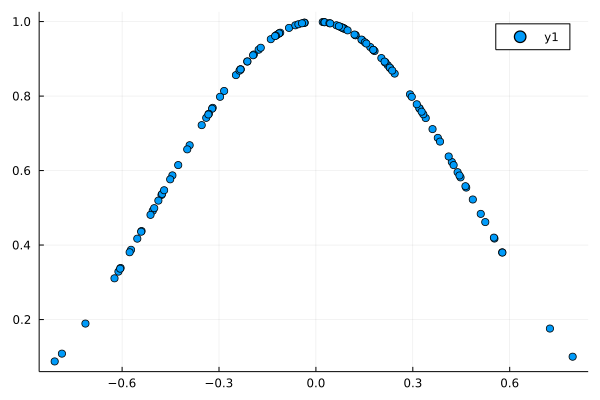

In [405]:
plot(x, pdf(dist, x), seriestype = :scatter)

┌ Info: Saved animation to 
│   fn = /home/beegass/Documents/Coding/Test_Ground/Distribution-Cosine{Float64}(μ=0.0, σ=1.0)-Samples.gif
└ @ Plots /home/beegass/.julia/packages/Plots/SkUg1/src/animation.jl:126


Plots.AnimatedGif("/home/beegass/Documents/Coding/Test_Ground/Distribution-Cosine{Float64}(μ=0.0, σ=1.0)-Samples.gif")
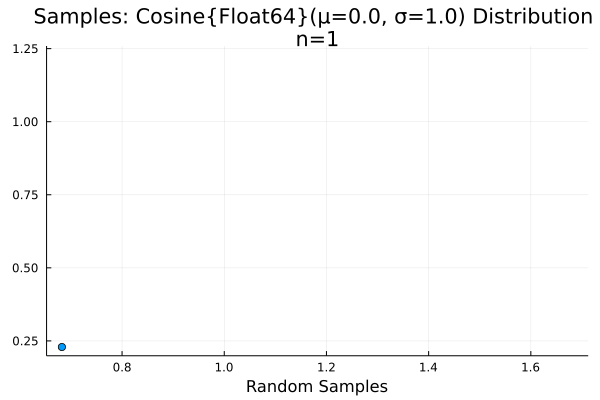

In [406]:
x, μ, σ = central_limit_theorem(n, dist);
means, vars = get_normals(x)
anim = @animate for i = 1:n
    plot(x[1:i], pdf(dist, x[1:i]), seriestype = :scatter, xlabel="Random Samples", title=("Samples: $(dist) Distribution \nn="*string(i)), lab=nothing)
end

if gifbool
    gif(anim, "Distribution-$(dist)-Samples.gif", fps = gif_fps);
else
    display(gif(anim));
end

┌ Info: Saved animation to 
│   fn = /home/beegass/Documents/Coding/Test_Ground/Mean-Distribution-Cosine{Float64}(μ=0.0, σ=1.0)-Samples.gif
└ @ Plots /home/beegass/.julia/packages/Plots/SkUg1/src/animation.jl:126


Plots.AnimatedGif("/home/beegass/Documents/Coding/Test_Ground/Mean-Distribution-Cosine{Float64}(μ=0.0, σ=1.0)-Samples.gif")
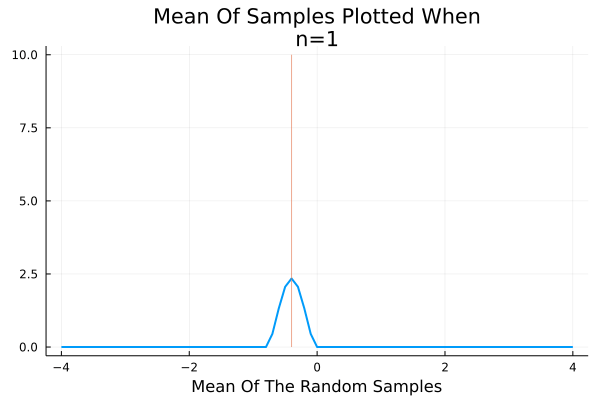

In [407]:
x, μ, σ = central_limit_theorem(n, dist);
means, vars = get_normals(x)
anim = @animate for i = 1:n
    o = ash(means[1:i]; rng = -4:.1:4, m=M)
    plot(o, xlabel="Mean Of The Random Samples", title=("Mean Of Samples Plotted When\nn="*string(i)), lab=nothing)
end

if gifbool
    gif(anim, "Mean-Distribution-$(dist)-Samples.gif", fps = gif_fps);
else
    display(gif(anim));
end

┌ Info: Saved animation to 
│   fn = /home/beegass/Documents/Coding/Test_Ground/Var-Distribution-Cosine{Float64}(μ=0.0, σ=1.0)-Samples.gif
└ @ Plots /home/beegass/.julia/packages/Plots/SkUg1/src/animation.jl:126


Plots.AnimatedGif("/home/beegass/Documents/Coding/Test_Ground/Var-Distribution-Cosine{Float64}(μ=0.0, σ=1.0)-Samples.gif")
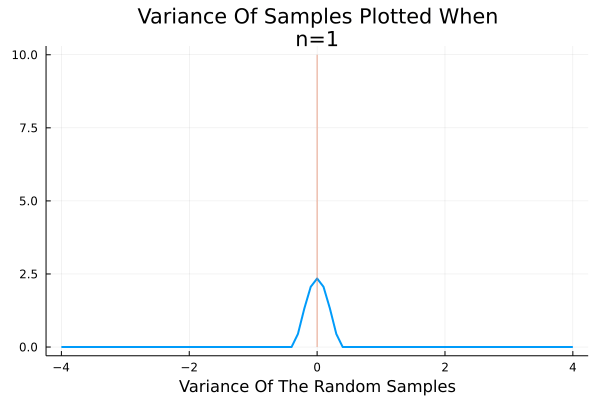

In [408]:
x, μ, σ = central_limit_theorem(n, dist);
means, vars = get_normals(x)
anim = @animate for i = 1:(n-1)
    o = ash(vars[1:i]; rng = -4:.1:4, m=M)
    plot(o, xlabel="Variance Of The Random Samples", title=("Variance Of Samples Plotted When\nn="*string(i)), lab=nothing)
end

if gifbool
    gif(anim, "Var-Distribution-$(dist)-Samples.gif", fps = gif_fps);
else
    display(gif(anim));
end